# Exploratory Data Analysis

The first step when dealing with a new dataset is to explore the data in order to :
* better understand the structure of the dataset,
* understand the various types of data available,
* understand the relations between variables and with the target.

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from context import *

In [ ]:
df = pd.read_csv('data_extract.csv')

In [ ]:
print(df.shape)
df.head()

(13533, 43)


age sex  visit_id    feat_0    feat_1  feat_2  feat_3  feat_4    feat_5  \
0   87   F      1226       NaN -1.979758     NaN     NaN     NaN -2.265400   
1   76   F      1194       NaN       NaN     NaN     NaN     NaN -0.222855   
2   57   M      2141       NaN       NaN     NaN     NaN     NaN  1.109240   
3    6   F      1750       NaN       NaN     NaN     NaN     NaN  1.642081   
4   63   M     11049  3.279681       NaN     NaN     NaN     NaN  1.730885   

   feat_6  ...  feat_30   feat_31  feat_32  feat_33   feat_34  feat_35  \
0     NaN  ...      NaN       NaN      NaN      NaN  0.912238      NaN   
1     NaN  ...      NaN       NaN      NaN      NaN -1.231702      NaN   
2     NaN  ...      NaN  0.148950      NaN      NaN  0.095499      NaN   
3     NaN  ...      NaN       NaN      NaN      NaN -1.333794      NaN   
4     NaN  ...      NaN  0.432363      NaN      NaN -1.946348      NaN   

   feat_36  feat_37   feat_38  feat_39  
0      NaN      NaN       NaN      NaN  
1      NaN      NaN       NaN      NaN  
2      NaN      NaN       NaN      NaN  
3      NaN      NaN       NaN      NaN  
4      NaN      NaN  1.214093      NaN  

[5 rows x 43 columns]

* This dataset contains 13 533 entries for 43 columns.
* The sex column seems to be a string. Bacause there is only two categories, we will be able to reduce this variable to a binary.
* There are 40 variables feat_ for which we have no indication of meaning. They seem to be floating point values and seem to have many missing values.

In [ ]:
df.describe().T

count          mean          std       min          25%  \
age       13533.0  5.803872e+01    21.365238 -2.000000    41.000000   
visit_id  13533.0  6.766000e+03  3906.784931  0.000000  3383.000000   
feat_0     2381.0 -2.984220e-18     1.000210 -1.658507    -0.561132   
feat_1     1395.0 -2.037399e-17     1.000359 -4.023873    -0.556179   
feat_2        0.0           NaN          NaN       NaN          NaN   
feat_3        0.0           NaN          NaN       NaN          NaN   
feat_4        3.0  0.000000e+00     1.224745 -0.764623    -0.706305   
feat_5    12712.0 -2.682981e-17     1.000039 -9.369907    -0.578078   
feat_6        0.0           NaN          NaN       NaN          NaN   
feat_7        0.0           NaN          NaN       NaN          NaN   
feat_8        0.0           NaN          NaN       NaN          NaN   
feat_9     1881.0 -1.888737e-17     1.000266 -5.425535    -0.507581   
feat_10      10.0  3.330669e-17     1.054093 -0.726900    -0.726900   
feat_11   13533.0  1.575134e-17     1.000037 -0.632005    -0.493759   
feat_12    1206.0  5.891731e-18     1.000415 -0.866338    -0.455418   
feat_13    1737.0  2.045316e-18     1.000288 -1.875290    -0.467353   
feat_14    9024.0  4.094440e-17     1.000055 -1.131826    -0.325570   
feat_15    2381.0  9.325687e-18     1.000210 -2.805615    -0.710567   
feat_16   12712.0 -1.341490e-17     1.000039 -5.898816    -0.572000   
feat_17    2381.0  5.670018e-17     1.000210 -0.054169    -0.054169   
feat_18     811.0  3.942592e-17     1.000617 -0.142323    -0.048000   
feat_19    1426.0  1.993107e-17     1.000351 -2.053498    -0.420548   
feat_20     141.0  1.259828e-17     1.003565 -0.820035    -0.590063   
feat_21    1441.0  3.205085e-17     1.000347 -0.956793    -0.386202   
feat_22       0.0           NaN          NaN       NaN          NaN   
feat_23       0.0           NaN          NaN       NaN          NaN   
feat_24   12712.0 -8.943269e-18     1.000039 -2.451618    -0.650523   
feat_25       0.0           NaN          NaN       NaN          NaN   
feat_26   12712.0 -2.235817e-18     1.000039 -4.899463    -0.636950   
feat_27    9238.0 -1.192186e-17     1.000054 -5.217771    -0.651455   
feat_28     670.0  2.651279e-18     1.000747 -0.293217    -0.273214   
feat_29    1143.0  3.729883e-17     1.000438 -0.273930    -0.192125   
feat_30     488.0  2.548053e-17     1.001026 -0.269881    -0.183144   
feat_31    7644.0 -1.115452e-17     1.000065 -1.752900    -0.663998   
feat_32    1105.0  4.501176e-17     1.000453 -0.074391    -0.068345   
feat_33       2.0  0.000000e+00     1.414214 -1.000000    -0.500000   
feat_34   12574.0  1.808284e-17     1.000040 -3.477734    -0.721240   
feat_35    1105.0  2.893613e-17     1.000453 -0.168075    -0.161279   
feat_36     610.0  2.329648e-17     1.000821 -3.861996    -0.660550   
feat_37     355.0  2.001529e-17     1.001411 -0.660800    -0.660800   
feat_38    3496.0  2.032445e-18     1.000143 -1.306937    -0.597897   
feat_39     651.0  0.000000e+00     1.000769 -2.123448    -0.713803   

                  50%           75%           max  
age         58.000000     75.000000    115.000000  
visit_id  6766.000000  10149.000000  13532.000000  
feat_0      -0.012444      0.536243      9.315244  
feat_1       0.100859      0.666640      3.039273  
feat_2            NaN           NaN           NaN  
feat_3            NaN           NaN           NaN  
feat_4      -0.647986      0.382312      1.412609  
feat_5       0.043563      0.665208      3.684626  
feat_6            NaN           NaN           NaN  
feat_7            NaN           NaN           NaN  
feat_8            NaN           NaN           NaN  
feat_9       0.122304      0.679510      2.399583  
feat_10     -0.396491     -0.066082      2.246783  
feat_11     -0.284222      0.141626     26.045653  
feat_12     -0.244405      0.141527     17.980466  
feat_13     -0.232697      0.119287     11.304561  
feat_14     -0.164319      0.050683     53.156099  
feat_15     -0.277109 

**visit_id**

visit_id is the internal identifier of a specific visit.
We will assume that no information is available is this feature because it ranges from 0 to 13532.

**sex** 

sex is the only categorical variable natively in the dataset.
This variable is always filled so it is enough to encode it as a boolean.
Then there is no need for more advanced categorical encoding.

**age**

The age of the patient is encoded as an integer.
There seem to be strange values.
The $-2$ value which is the minimum of this variable is obviously an error.
However, they are very few and we have no indication whatsoever to give them a better value.
They will remain that way.

The second strange value is the maximum $115$ years.
While this value is still possible (Jeanne Calment died at 122), we still need to be cautious.
Looking at the distribution of this value, we see that we have a significant amount of very old patients $>100$ years.
We expect that very old person may go to the hospital, even more than youger persons, respectively.
The shape of this distribution is quite smooth.
So there is no indication that this variable may be of low quality.

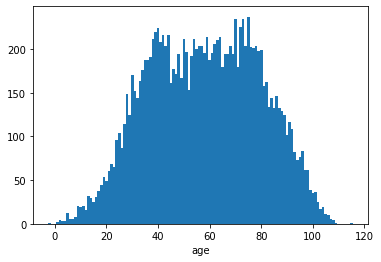

In [ ]:
draw_hist(df, 'age', bins=np.linspace(-2.5, 115.5, 119));

**feat**

There are 40 variables labels feat_\*.
These variables are all floating point values and are already scaled to 0 mean and a standard deviation of 1.
There seem to be an inhomegeneity in the amount of filling throughout these columns.
feat_11 is fully filled and feat_8 is fully empty.
This will require special care when dealing with those variables.

The plot below show, for 500 random visits, which variables are actually filled.
If the dataset had no missing data, the full plot would be blue (like the variable feat_11).
Instead we see a graph that can be quite sparse for some columns.

In [ ]:
test = df[[x for x in df.columns if x.startswith('feat')]]
msno.matrix(test.sample(500), sparkline=True, figsize=(20,10), sort=None, color=(0.25, 0.45, 0.6));

We observe that there is a lot of missing data.
With that amount of missing data, let's look if there is pattern in them.
If we suppose that features are measurement during medical examination, some of them way have a tendency to be present together.
For example, blood parameters may all be present together after a blood sample, while they would all be absent if the visit is just an eye exam.
The following plot show the correlation between the missingness of features.
We observe that some features are grouped together.
For example, features 0, 15, 17 always appear at the same time.
The same for features 16, 24, 26, 34.
We may be able to leverage this in the future.

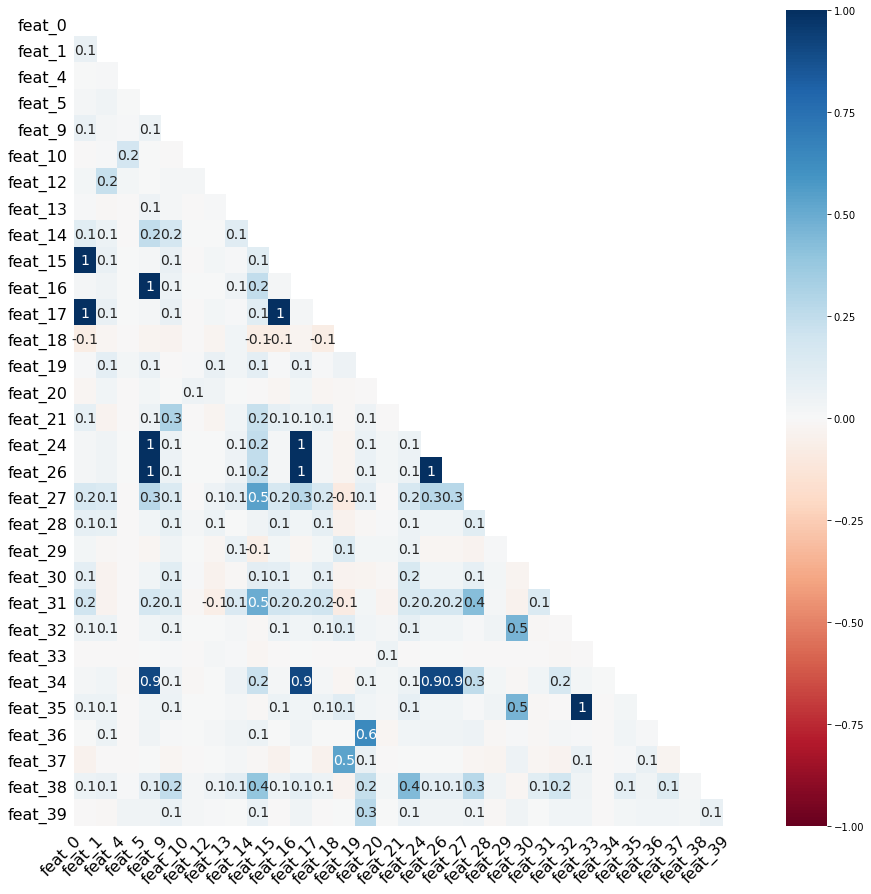

In [ ]:
msno.heatmap(test, figsize = (15, 15));

# Variables content

## Target variable

The objective of the project is to predict if the patient related to the visit will develop hear infection.
Expert knowledge tells us that there is a high risk of hear infection if feat_27 is above 3.
There is still a mild risk if that feature is above 1.5.
Let's look at the the distribution of this variable.

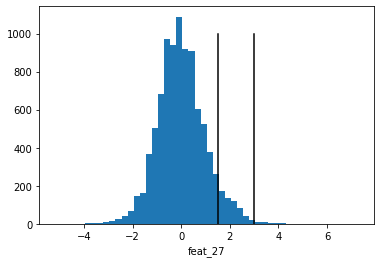

In [ ]:
ax = draw_hist(df, 'feat_27', bins=50)
ax.plot([1.5, 1.5], [0, 1000], color='black')
ax.plot([3, 3], [0, 1000], color='black');

We observe that the distribution is roughly Gaussian.
As a result, patients with feat_27 above 1.5 are a minority, even more for patients with feat_27 above 3.
The objective of the project is then to detect extreme cases.
As a result, a classification will be more adapted than a regression.
This regression will be unbalanced : only $7\%$ of the visits have a mild risk.
The situation is even more unbalanced for high risk patients.

In [ ]:
trainable = df[df.feat_27.notnull()]
print('Rate of patient at least at mild risk :',  np.round((trainable.feat_27>1.5).mean()*100, 2), "%")

Rate of patient at least at mild risk : 6.78 %


In [ ]:
print('Rate of patient at high risk :',  np.round((trainable.feat_27>3).mean()*100, 2), "%")

Rate of patient at high risk : 0.44 %


In [ ]:
masks = [('high', df.feat_27>=3),
        ('mild', df.feat_27>=1.5),
        ('no_risk', df.feat_27<1.5),
        ('missing', df.feat_27.isnull())]

## Age

Age is a fully filled variable with easy interpretation.
Let's look at its distribution with respect to the risk of hear infection.
We see that hear infection is a bit more probable for older patients.
This variable may play a role is predicting a high value of feat_27.

In [ ]:
compare_hists(df, 'age', masks);

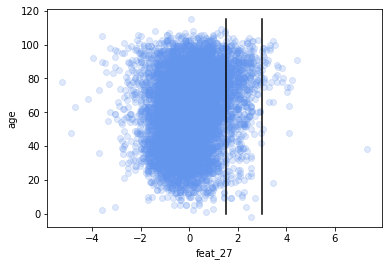

In [ ]:
ax = compare_scatter(trainable, 'feat_27', 'age')
ax.plot([1.5, 1.5], [0, 115], color='black')
ax.plot([3, 3], [0, 115], color='black');

## features

We can draw a scatter plot of all features, with respect to feat_27 in order to find possible patterns to exploit.
The techniques of classification we will use later can easily deal with monotonous correlations between variables.
Here, we are looking for more complex correlations.

Unfortunately, no obvious correlation (monotonous or otherwise) is observed.

**Each variable will only bring a small amount of information.**

/mnt/c/Users/christophe_goudet/Documents/dev/technical_test/healthcare_startup/visualize.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


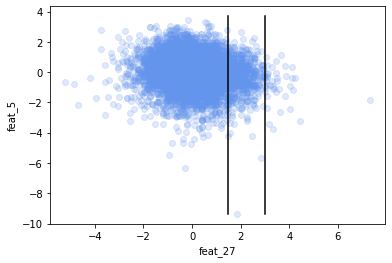

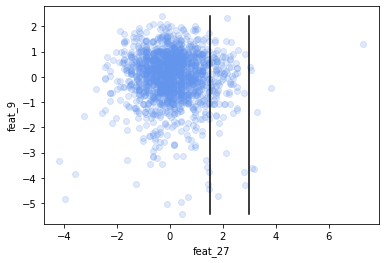

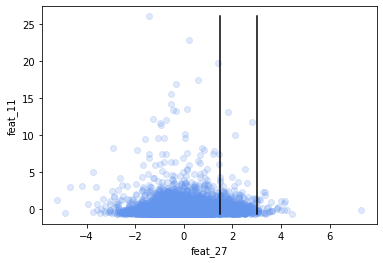

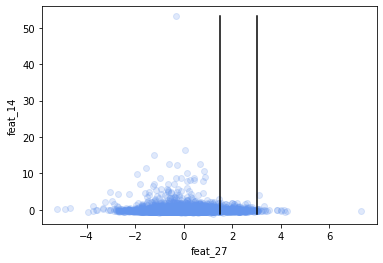

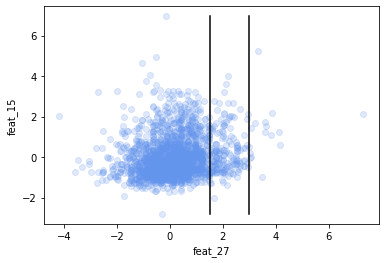

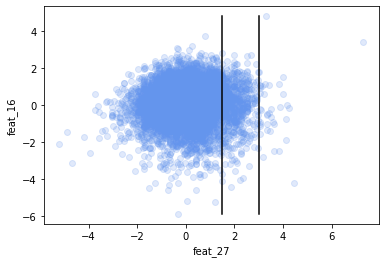

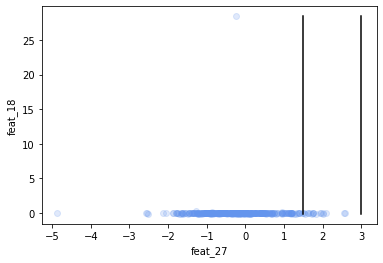

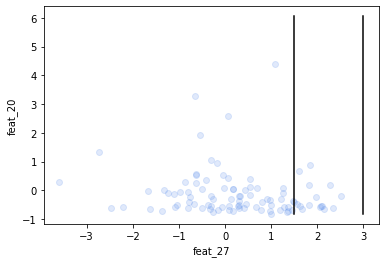

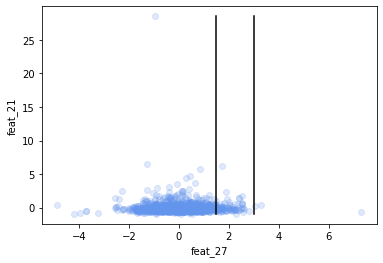

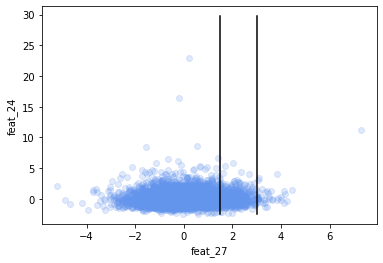

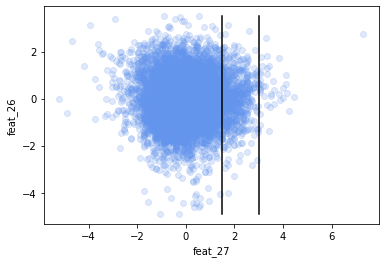

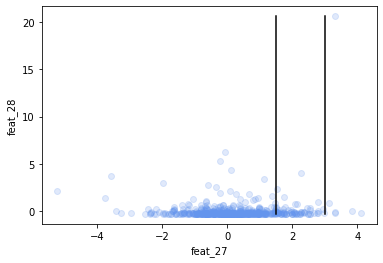

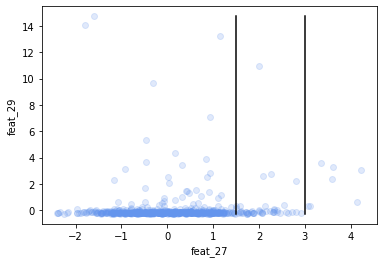

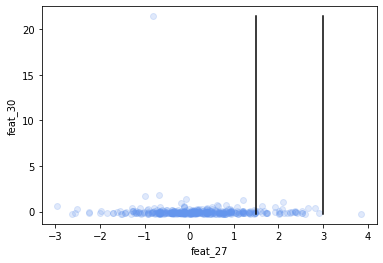

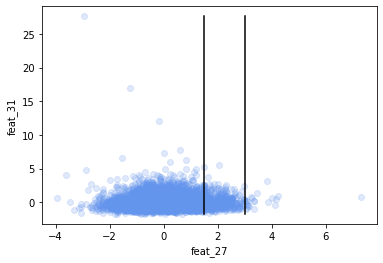

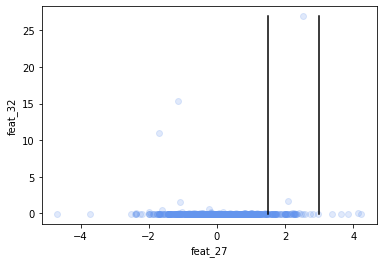

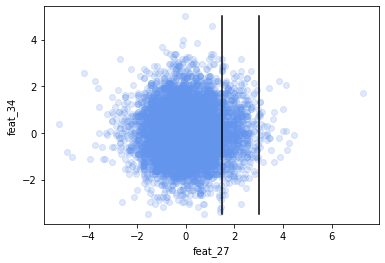

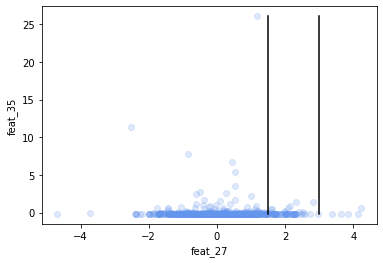

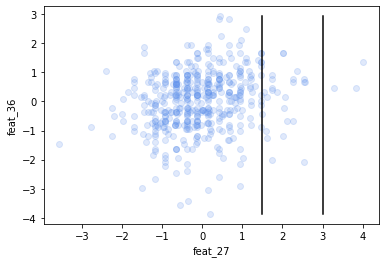

In [ ]:
plt.close('all')
for c in [x for x in df.columns if x.startswith('feat')]:
    has_point = df[c].notnull()&df['feat_27'].notnull()
    if (c=='feat_27') or (has_point.sum()<10):
        continue
    mn, mx = df[c].min(), df[c].max()
    ax = compare_scatter(trainable, 'feat_27', c)
    ax.plot([1.5, 1.5], [mn, mx], color='black')
    ax.plot([3, 3], [mn, mx], color='black')

# Conclusion

* A minority of visits lead to hear infection -> **Unbalanced classification**
* Many missing values -> **Need a strategy of valorisation of missing information**
* No obvious correlation -> **Need a non linear model**